In [1]:
import numpy as np
import mesa
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
from scipy.stats import zscore
%load_ext autoreload
%autoreload 2

In [3]:
from ice_fishing_abm_1.model import Model as m1

In [11]:
%%time
params = {
    "grid_width": 100, 
    "grid_height": 100, 
    "number_of_agents": 1, # 5, # (1, 2, 3, 4, 5, 6, 7, 8, 9), # 
    "n_resource_clusters": 5,
    "exploration_threshold": 0.1, # (0, 0.01, 0.05, 0.1, 0.5, 0.7), # 
    "prior_knowledge": 0.05, # (0, 0.01, 0.05, 0.1, 0.2, 0.4, 0.6, 0.8)
    "sampling_length": np.arange(3, 60, 6), # 30 # 10, # 
    # "social_influence_threshold": 1, # (0.01, 0.5, 1, 1.5, 2), #  np.linspace(0.01, 2, 10),
    "relocation_threshold": np.arange(0.1, 1.1, 0.1)  # 0.4, # 
}

n_repetitions = 300
n_steps = 1000

results = mesa.batch_run(
    m1,
    parameters=params,
    iterations=n_repetitions,
    max_steps=n_steps,
    number_processes=8,
    data_collection_period=-1,
    display_progress=True,
)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 30000/30000 [52:42<00:00,  9.49it/s]

CPU times: user 21.4 s, sys: 7.42 s, total: 28.8 s
Wall time: 52min 42s


In [22]:
results_df = pd.DataFrame(results)
print(results_df.keys())

Index(['RunId', 'iteration', 'Step', 'grid_width', 'grid_height',
       'number_of_agents', 'n_resource_clusters', 'exploration_threshold',
       'prior_knowledge', 'sampling_length', 'relocation_threshold',
       'Collected resource'],
      dtype='object')


In [24]:
# results_last_step_df = results_df[results_df['Step'] == 1000]

param1 = "relocation_threshold"
param2 = "sampling_length"

# average over the iterations
results_last_step_df = results_df.groupby([param1, param2]).mean().reset_index()
results_last_step_df.loc[:, param1] = results_last_step_df[param1].round(2)
results_last_step_df.loc[:, param2] = results_last_step_df[param2].round(2)
heatmap_df = results_last_step_df.pivot(index=param1, columns=param2, values='Collected resource') / n_steps

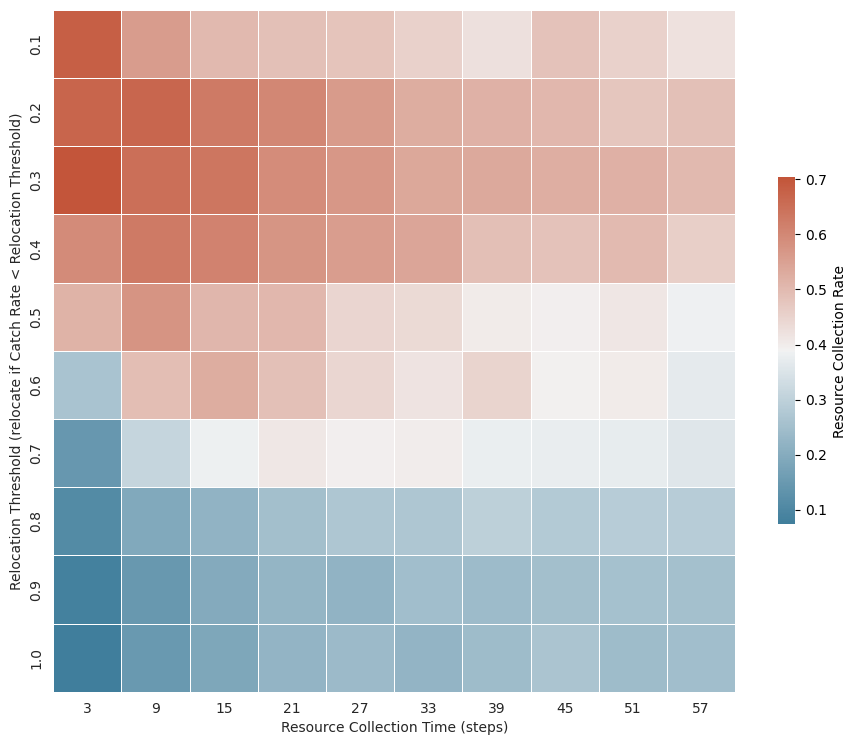

In [25]:

# sns.set_theme(style="white")
# sns.heatmap(heatmap_df, cmap="viridis", # vmin=0,#  vmax=500,
#             cbar_kws={'label': 'Collected resource'})
# plt.show();


with sns.axes_style("white"):
    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)
# cmap = "viridis"


# Draw the heatmap with the mask and correct aspect ratio
g = sns.heatmap(heatmap_df, cmap=cmap, # vmax=.3, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .5, "label": "Resource Collection Rate"})

# plt.ylabel("Threshold for Social Influence (lower=more sensitive)")
# plt.xlabel("The Number of Agents")

plt.xlabel("Resource Collection Time (steps)")
# plt.ylabel("Exploration Threshold (1 = Random Agent)")
plt.ylabel("Relocation Threshold (relocate if Catch Rate < Relocation Threshold)")


plt.savefig(f"2023-09-25 {param1} vs. {param2} m1 {n_repetitions} repetitions.png", dpi=300)
plt.show()

In [ ]:
sns.lineplot(data=results_df, x="Step", y="Collected resource", hue="number_of_agents", errorbar=None)
